In [13]:
from transformers import AutoImageProcessor, AutoModelForKeypointMatching
from transformers.image_utils import load_image
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Load a pair of images
image1 = load_image("https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/refs/heads/master/assets/phototourism_sample_images/united_states_capitol_98169888_3347710852.jpg")
image2 = load_image("https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/refs/heads/master/assets/phototourism_sample_images/united_states_capitol_26757027_6717084061.jpg")

images = [image1, image2]

# Load the processor and model from the Hugging Face Hub
processor = AutoImageProcessor.from_pretrained("zju-community/matchanything_eloftr")
model = AutoModelForKeypointMatching.from_pretrained("zju-community/matchanything_eloftr")

# Process images and get model outputs
inputs = processor(images, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)



In [14]:
image_sizes = [[(image.height, image.width) for image in images]]
outputs = processor.post_process_keypoint_matching(outputs, image_sizes, threshold=0.2)
for i, output in enumerate(outputs):
    print("For the image pair", i)
    for keypoint0, keypoint1, matching_score in zip(output["keypoints0"], output["keypoints1"], output["matching_scores"]):
        pass
        # print(f"Keypoint at coordinate {keypoint0.numpy()} in the first image matches with keypoint at coordinate {keypoint1.numpy()} in the second image with a score of {matching_score}.")
    


For the image pair 0


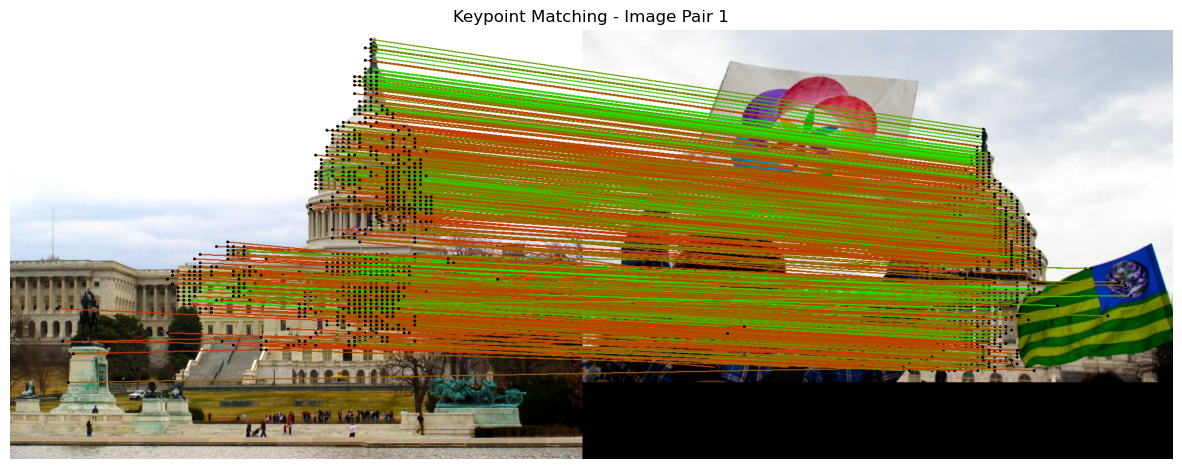

In [15]:
plot_images = processor.visualize_keypoint_matching(images, outputs)

# Display the plotted images
for i, plot_image in enumerate(plot_images):
    plt.figure(figsize=(15, 8))
    plt.imshow(plot_image)
    plt.title(f"Keypoint Matching - Image Pair {i+1}")
    plt.axis('off')
    plt.show()

Refs: [1](https://github.com/zju3dv/EfficientLoFTR), [2](https://huggingface.co/zju-community/matchanything_eloftr)